# Predicting the extent of regional drought in one weeks time

The USDM keeps statistics on the percentage of drought in different major climatic regions of the contiguous United States. 
This is a large enough area that the drought data doesn't just immediately jump from zero to 100%. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

We consider comprehensive statistics -- that is the percentage (of land area) that each climate region is in the D0-D4 drought categories.

## Overview of the data 

In [2]:
dm_data= pd.read_csv("../Data/climate_region_comprehensive_D0_through_D4.csv")
dm_data

,MapDate,Region,None,D0,D1,D2,D3,D4,ValidStart,ValidEnd,StatisticFormatID
0,20231010,High Plains,57.12,42.88,27.48,15.26,5.44,0.97,2023-10-10,2023-10-16,1
1,20231010,Midwest,16.15,83.85,55.51,21.95,6.14,0.35,2023-10-10,2023-10-16,1
2,20231010,Northeast,83.24,16.76,2.47,0.27,0.00,0.00,2023-10-10,2023-10-16,1
3,20231010,South,15.63,84.37,66.02,48.72,27.77,11.61,2023-10-10,2023-10-16,1
4,20231010,Southeast,40.27,59.73,27.26,8.68,1.26,0.00,2023-10-10,2023-10-16,1
...,...,...,...,...,...,...,...,...,...,...,...
7441,20000104,Midwest,26.35,73.65,41.30,7.29,0.00,0.00,2000-01-04,2000-01-10,1
7442,20000104,Northeast,92.83,7.17,2.58,0.00,0.00,0.00,2000-01-04,2000-01-10,1
7443,20000104,South,14.90,85.10,57.90,30.74,0.00,0.00,2000-01-04,2000-01-10,1
7444,20000104,Southeast,28.58,71.42,42.59,19.20,0.00,0.00,2000-01-04,2000-01-10,1


In [3]:
regions = set(dm_data["Region"])
regions

{'High Plains', 'Midwest', 'Northeast', 'South', 'Southeast', 'West'}

### Visualization of drought data from different counties

Before training our model, we look at what this data looks like from different climate regions in the U.S. 

In [4]:
def get_region(region_name):
    return dm_data.loc[dm_data["Region"] == region_name][::-1] # make in chronological order

In [5]:
def plot_region(region_name):
    region = get_region(region_name)

    fig, axs = plt.subplots(1,1,sharex=True,sharey=True,figsize=(15,5))
    axs.fill_between(x=region["ValidEnd"],y1=0,y2=region["D0"],color="k",alpha=0.1,label="D0")
    axs.fill_between(x=region["ValidEnd"],y1=0,y2=region["D1"],color="k",alpha=0.3,label="D1")
    axs.fill_between(x=region["ValidEnd"],y1=0,y2=region["D2"],color="k",alpha=0.5,label="D2")
    axs.fill_between(x=region["ValidEnd"],y1=0,y2=region["D3"],color="k",alpha=0.7,label="D3")
    axs.fill_between(x=region["ValidEnd"],y1=0,y2=region["D4"],color="k",alpha=0.9,label="D4")
    axs.set_xticks(axs.get_xticks()[::156])
    axs.set_xlabel("Date") 
    axs.set_ylabel("Percentage in drought")
    axs.legend()
    fig.suptitle(region_name)
    plt.tight_layout()
    plt.savefig("total_drought_"+region_name+".png")

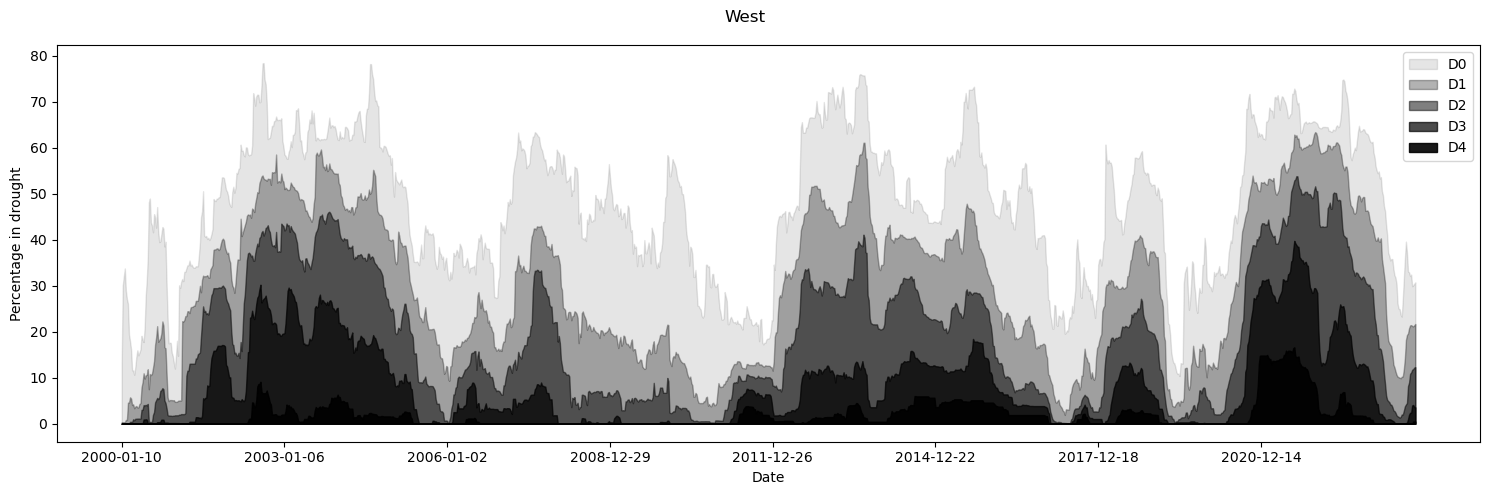

In [6]:
plot_region("West")

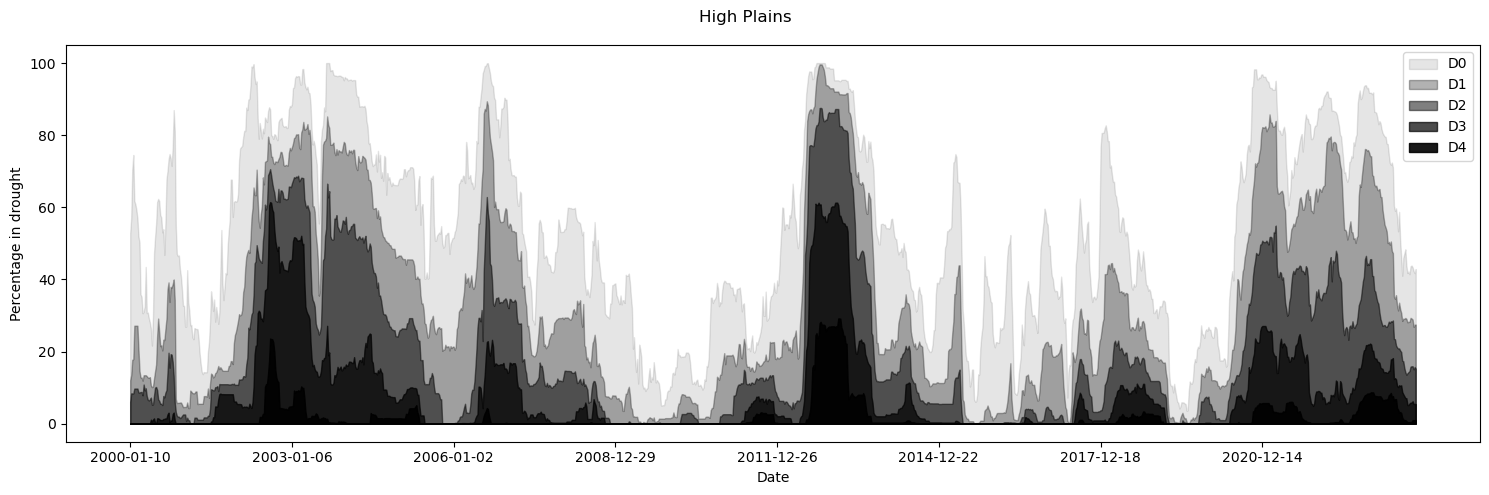

In [7]:
plot_region("High Plains")

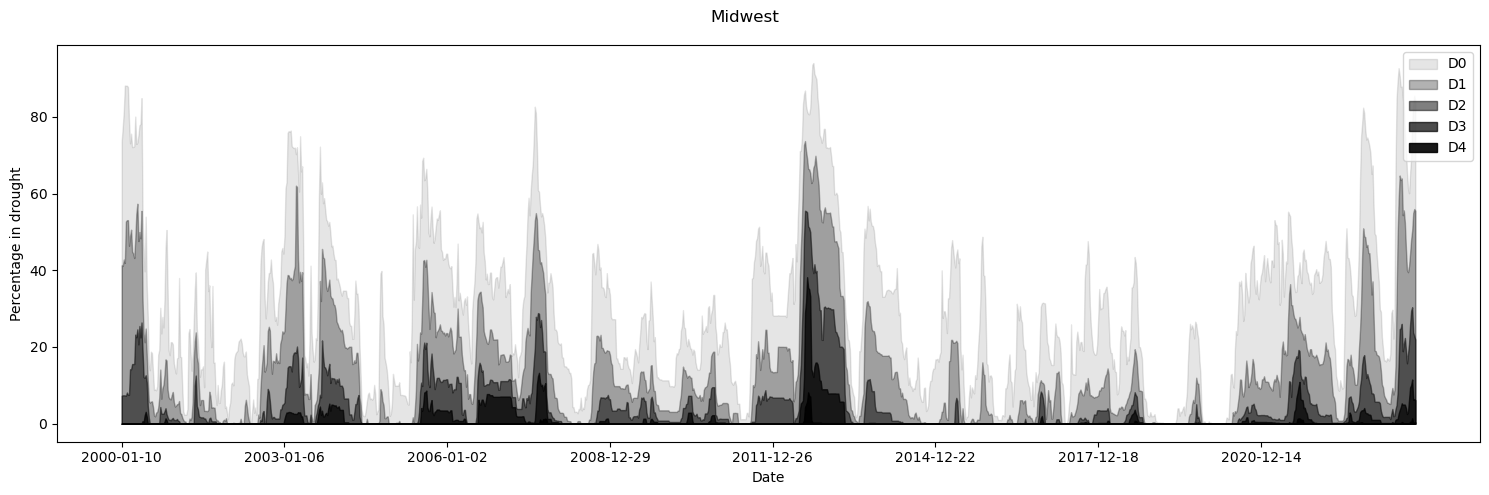

In [8]:
plot_region("Midwest")

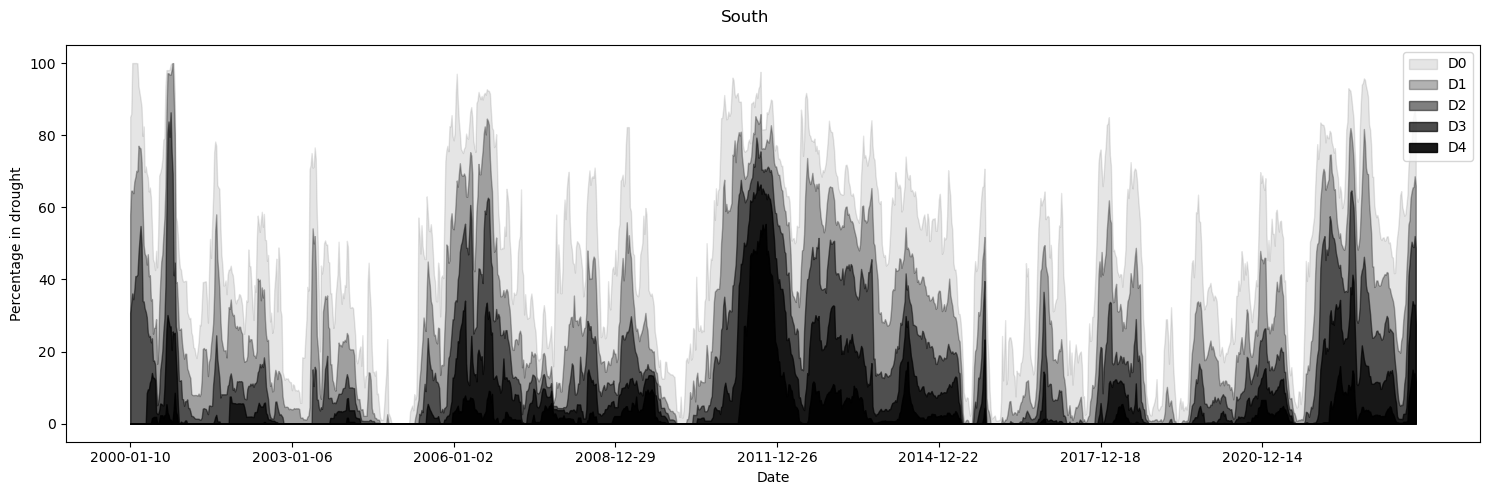

In [9]:
plot_region("South")

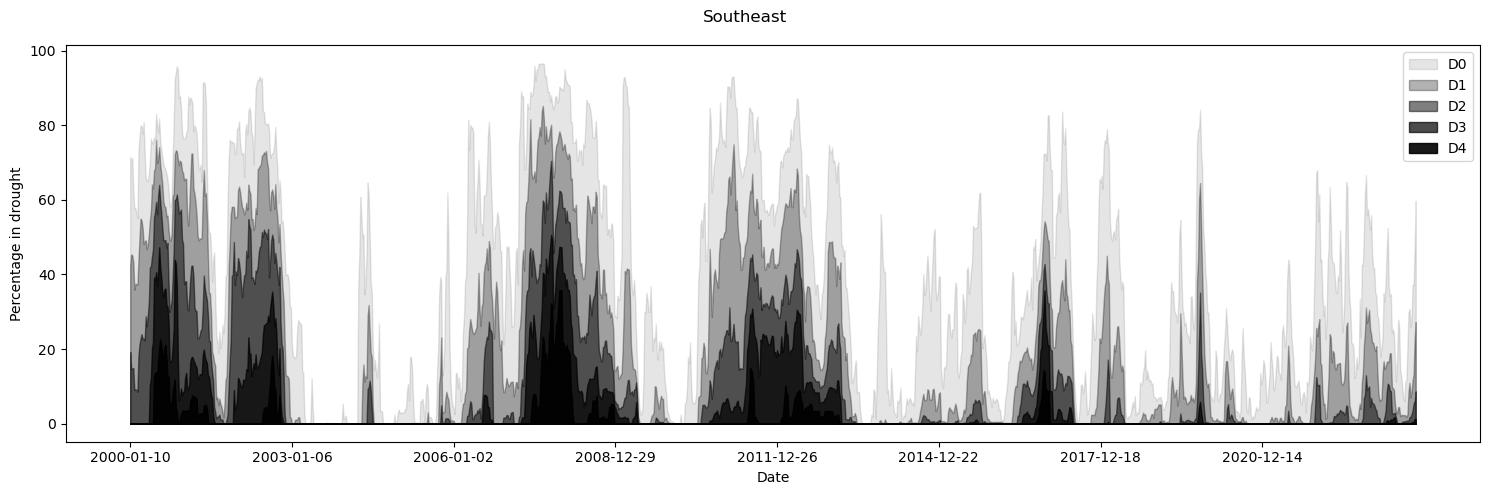

In [10]:
plot_region("Southeast")

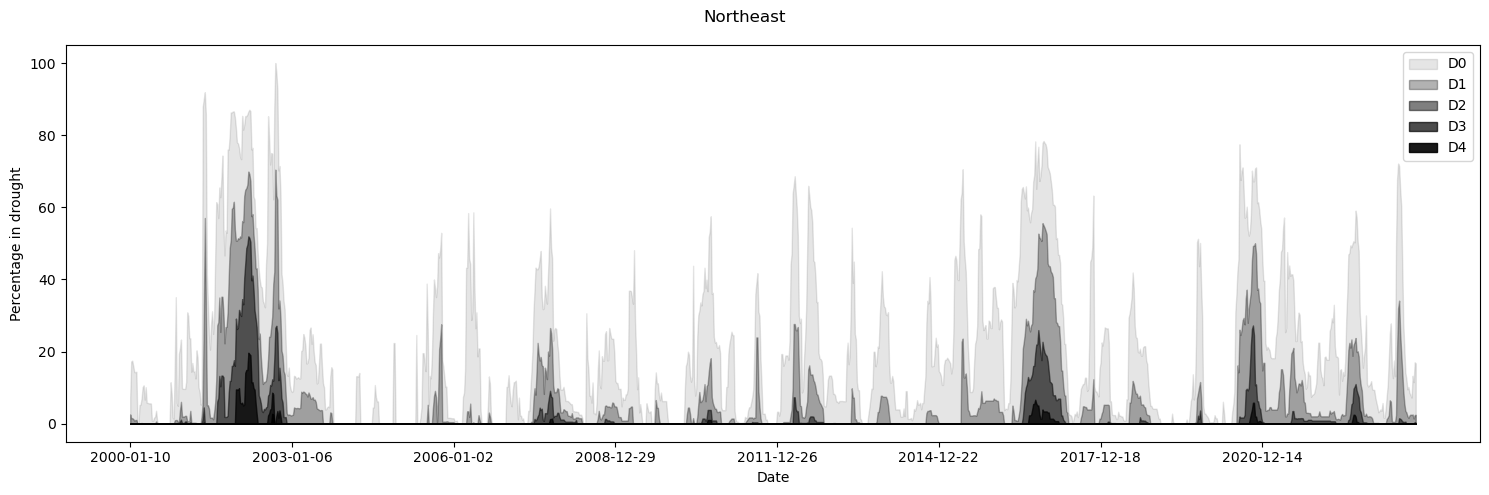

In [11]:
plot_region("Northeast")

### Summary statistics

Our main takeaway from this qualitative analysis is that drought appears to have been much more extensive and severe in the West/High Plains of the U.S., while drought has been least common in the northeast. 
We can see this a different way by considering the mean and standard deviations of the different drought levels.

In [12]:
for region in regions:
    print(f"Mean drought of {region}:")
    print(f"\t D0: {np.mean(get_region(region)['D0']):.4f} +/- {np.std(get_region(region)['D0']):.2f}")
    print(f"\t D1: {np.mean(get_region(region)['D1']):.4f} +/- {np.std(get_region(region)['D1']):.2f}")
    print(f"\t D2: {np.mean(get_region(region)['D2']):.4f} +/- {np.std(get_region(region)['D2']):.2f}")
    print(f"\t D3: {np.mean(get_region(region)['D3']):.4f} +/- {np.std(get_region(region)['D3']):.2f}")
    print(f"\t D4: {np.mean(get_region(region)['D4']):.4f} +/- {np.std(get_region(region)['D4']):.2f}")

Mean drought of West:
	 D0: 47.8946 +/- 15.61
	 D1: 30.6061 +/- 16.51
	 D2: 18.9620 +/- 14.58
	 D3: 8.4200 +/- 9.15
	 D4: 1.8778 +/- 3.11
Mean drought of Midwest:
	 D0: 29.4902 +/- 21.20
	 D1: 13.6443 +/- 15.12
	 D2: 4.8602 +/- 7.85
	 D3: 1.2314 +/- 3.33
	 D4: 0.0552 +/- 0.46
Mean drought of South:
	 D0: 47.2636 +/- 25.78
	 D1: 30.5705 +/- 23.22
	 D2: 17.8956 +/- 18.12
	 D3: 8.5366 +/- 12.27
	 D4: 2.8582 +/- 7.33
Mean drought of High Plains:
	 D0: 54.4743 +/- 26.79
	 D1: 34.3974 +/- 26.74
	 D2: 20.2624 +/- 21.57
	 D3: 8.9396 +/- 13.60
	 D4: 1.8907 +/- 4.80
Mean drought of Southeast:
	 D0: 39.2310 +/- 29.43
	 D1: 21.4408 +/- 23.92
	 D2: 11.2094 +/- 16.72
	 D3: 5.0416 +/- 9.92
	 D4: 1.4285 +/- 4.48
Mean drought of Northeast:
	 D0: 21.0219 +/- 22.17
	 D1: 6.6900 +/- 12.76
	 D2: 1.8622 +/- 6.12
	 D3: 0.3138 +/- 1.64
	 D4: 0.0042 +/- 0.10


# Training a recurrent neural network on Western drought data

We would like to give some function a timestream of data that lists the percentage of D0-D4 for a county, and for that function to predict for us the percentages of D0-D4 one week from now. As we are dealing with a time stream, a recurrent neural network seems most appropriate.

In [13]:
import torch
import torch.nn as nn
import base_rnn

In [14]:
class LSTMModel(nn.Module):
    """
    For reading in one dimensional time series data. 
    """
    def __init__(self, input_dim = 1, hidden_dim = 50, layer_dim = 1, output_dim = 1):
        super(LSTMModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim
        self.lstm = nn.LSTM(input_dim, hidden_dim, layer_dim, batch_first=True)
        self.linear = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()
        c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

        # We need to detach as we are doing truncated backpropagation through time (BPTT)
        # If we don't, we'll backprop all the way to the start even after going through another batch
        # We make a view to x so that it is a 3 index tensor. We assume one batch.

        out, (hn, cn) = self.lstm(x.view(len(x),1,-1), (h0.detach(), c0.detach()))
        out = self.linear(out.view(len(x),-1))

        # last element is the prediction from the sequence of inputs 
        return out[-1]

In [15]:
def input_data(seq,ws):
    out = []
    L = len(seq)
    
    for i in range(L-ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window,label))
    
    return out

#### Rescaling data 

We rescale the data so that it runs from $[0,1]$ instead of $[0,100]$.

In [16]:
torch.manual_seed(42)
model = base_rnn.LSTMModel()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [17]:
model

LSTMModel(
  (lstm): LSTM(1, 50, batch_first=True)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)

In [18]:
def get_region_train_test(region_name, category, train_size):
    region = get_region(region_name)
    train = torch.tensor(np.array(region[category][:train_size])).type(torch.float32)
    test  = torch.tensor(np.array(region[category][train_size:])).type(torch.float32)

    train /= 100
    test  /= 100
    return train, test

In [19]:
region_name = "West"
category = "D2"

window_size = 50
train_size = 1000
train_set, test_set = get_region_train_test(region, category, train_size)

train_data = input_data(train_set, window_size)

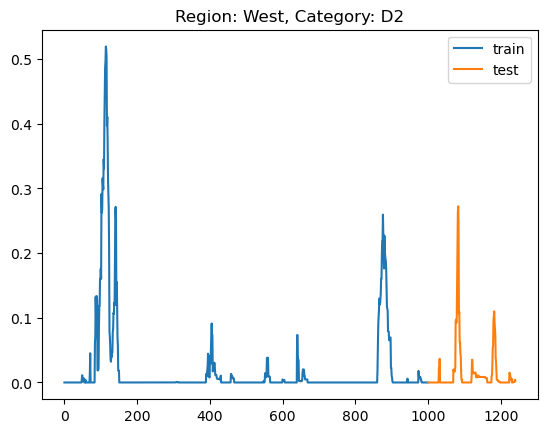

In [20]:
plt.plot(range(train_size),train_set,label="train")
plt.plot(range(train_size,train_size+len(test_set)),test_set,label="test")
plt.title(f"Region: {region_name}, Category: {category}")
plt.legend()

In [21]:
epochs = 100

for i in range(epochs):
    
    for seq, y_train in train_data:
        optimizer.zero_grad()

        y_pred = model(seq)
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
       
    print(f"Epoch {i} Loss: {loss.item()}")

Epoch 0 Loss: 8.909055031836033e-05
Epoch 1 Loss: 8.864558913046494e-05
Epoch 2 Loss: 8.819519280223176e-05
Epoch 3 Loss: 8.77397324074991e-05
Epoch 4 Loss: 8.72787568368949e-05
Epoch 5 Loss: 8.681194594828412e-05
Epoch 6 Loss: 8.633916877442971e-05
Epoch 7 Loss: 8.586006879340857e-05
Epoch 8 Loss: 8.537480607628822e-05
Epoch 9 Loss: 8.488271123496816e-05
Epoch 10 Loss: 8.438365330221131e-05
Epoch 11 Loss: 8.387769048567861e-05
Epoch 12 Loss: 8.33642334328033e-05
Epoch 13 Loss: 8.284343493869528e-05
Epoch 14 Loss: 8.231487299781293e-05
Epoch 15 Loss: 8.17784748505801e-05
Epoch 16 Loss: 8.12339858384803e-05
Epoch 17 Loss: 8.068126044236124e-05
Epoch 18 Loss: 8.012006583157927e-05
Epoch 19 Loss: 7.955035107443109e-05
Epoch 20 Loss: 7.897215255070478e-05
Epoch 21 Loss: 7.838487363187596e-05
Epoch 22 Loss: 7.778863800922409e-05
Epoch 23 Loss: 7.718329288763925e-05
Epoch 24 Loss: 7.656879461137578e-05
Epoch 25 Loss: 7.594483031425625e-05
Epoch 26 Loss: 7.531142182415351e-05
Epoch 27 Loss: 7

In [22]:
both_sets = torch.cat((train_set,test_set),0)

pred_train = np.array([model(both_sets[i-window_size:i+1]).detach().numpy()[0] for i in range(window_size,len(train_set))])
pred_test = np.array([model(both_sets[i-window_size:i]).detach().numpy()[0] for i in range(train_size,len(both_sets))])

Text(0.5, 1.0, 'Region: West, Category: D2')

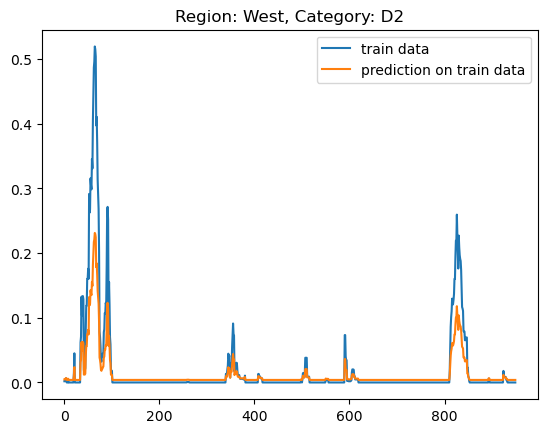

In [23]:
plt.plot(train_set[window_size:],label="train data")
plt.plot(pred_train,label="prediction on train data")
plt.legend()
plt.title(f"Region: {region_name}, Category: {category}")

Text(0.5, 1.0, 'Region: West, Category: D2')

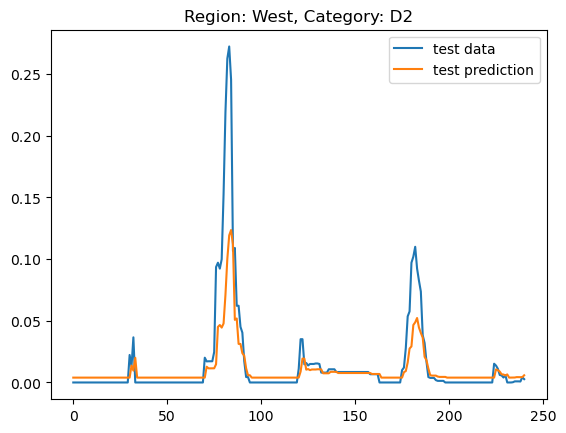

In [24]:
plt.plot(test_set,label="test data")
plt.plot(pred_test,label="test prediction")
plt.legend()
plt.title(f"Region: {region_name}, Category: {category}")

# Cross-validating our model on the other climate regions

The ultimate test of our model is to see if it can fit data from the other climate regions. The model seems to do unreasonably well at predicting future drought.

In [25]:
def compare_prediction(region_name, category):
    train, test = get_region_train_test(region_name, category, train_size)
    both = torch.cat((train,test),0)

    pred = np.array([model(both[i-window_size:i]).detach().numpy()[0] for i in range(window_size,len(both))])
    
    return np.array(both[window_size:]), pred

Text(0.5, 1.0, 'Region: High Plains, Category: D4')

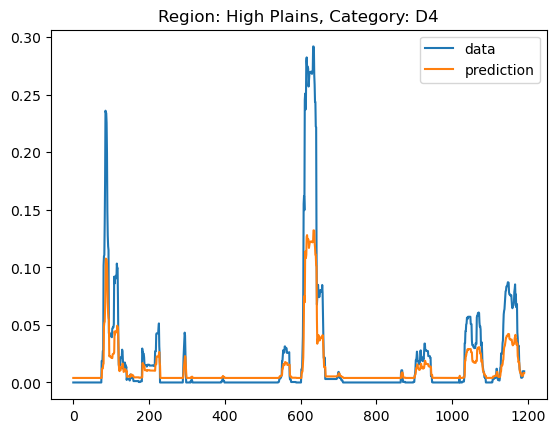

In [26]:
region_name = "High Plains"
category = "D4"
data, pred = compare_prediction(region_name, category)

plt.plot(data,label="data")
plt.plot(pred,label="prediction")
plt.title("High Plains, {")
plt.legend()
plt.title(f"Region: {region_name}, Category: {category}")

Text(0.5, 1.0, 'Region: Midwest, Category: D2')

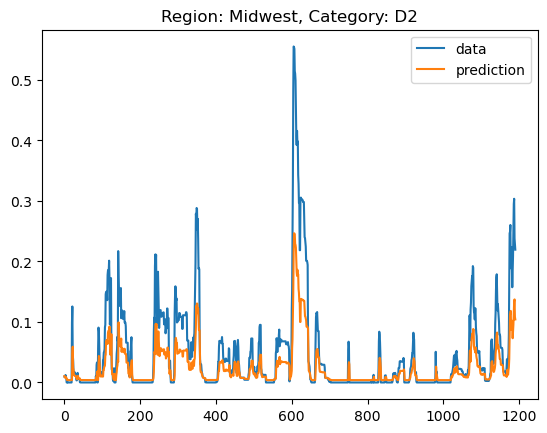

In [27]:
region_name = "Midwest"
category = "D2"
data, pred = compare_prediction(region_name, category)

plt.plot(data,label="data")
plt.plot(pred,label="prediction")
plt.title("High Plains, {")
plt.legend()
plt.title(f"Region: {region_name}, Category: {category}")

Text(0.5, 1.0, 'Region: South, Category: D2')

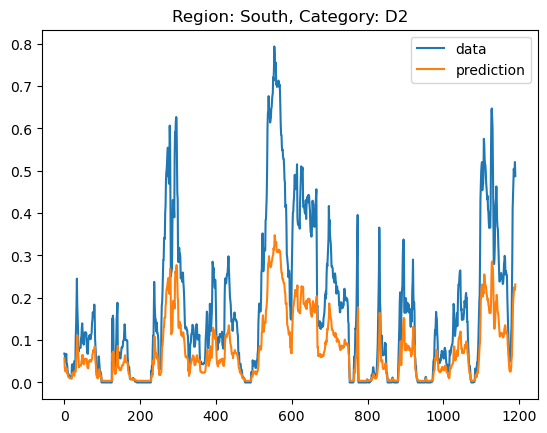

In [28]:
region_name = "South"
category = "D2"
data, pred = compare_prediction(region_name, category)

plt.plot(data,label="data")
plt.plot(pred,label="prediction")
plt.title("High Plains, {")
plt.legend()
plt.title(f"Region: {region_name}, Category: {category}")

Text(0.5, 1.0, 'Region: Southeast, Category: D3')

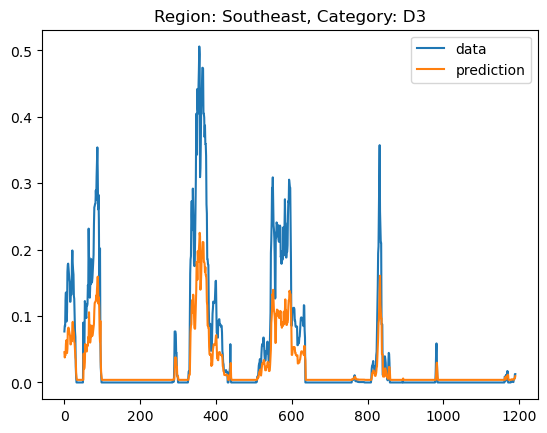

In [29]:
region_name = "Southeast"
category = "D3"
data, pred = compare_prediction(region_name, category)

plt.plot(data,label="data")
plt.plot(pred,label="prediction")
plt.title("High Plains, {")
plt.legend()
plt.title(f"Region: {region_name}, Category: {category}")

Text(0.5, 1.0, 'Region: Northeast, Category: D3')

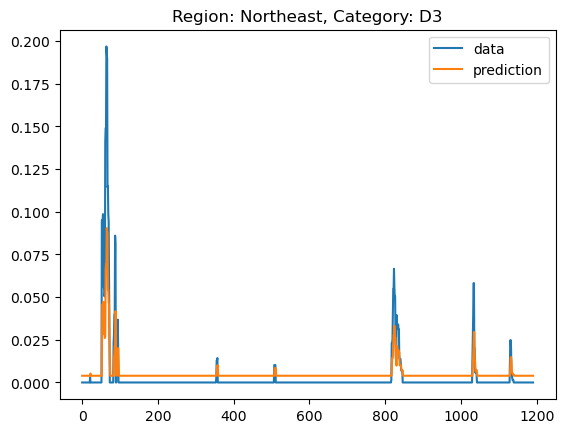

In [30]:
region_name = "Northeast"
category = "D3"
data, pred = compare_prediction(region_name, category)

plt.plot(data,label="data")
plt.plot(pred,label="prediction")
plt.title("High Plains, {")
plt.legend()
plt.title(f"Region: {region_name}, Category: {category}")

### The "unreasonable effectiveness" of RNNS in predicting drought?

We have only trained on 1000 data points in one geographical region, yet our model does an amazing job at fitting/predicting drought data in other regions around the continental United States. 
The model predictions are almost exactly what the data shows, up to a constant. 
A few questions to investigate

1. Does this indicate the method really is working well, or is there a mistake in how the how I'm evaluating the model?
2. What if we consider more localized data? e.g. at the state or county level.
3. Does the model work knowing the current level of drought does a good job at telling you next weeks level? Something akin to Gerd Gigerenzer's observations about fitting flu data. 